In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import skimage
from scipy.ndimage.measurements import histogram
from skimage.filters.rank import entropy
from sklearn.cluster import KMeans
from scipy import ndimage
import impavi 

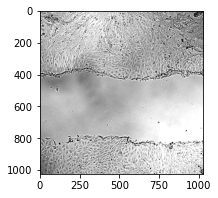

In [11]:
im = plt.imread('DIC_SN_15_L10_Sum00.tif')
plt.figure(figsize=(3,3))
plt.imshow(im,cmap='gray')

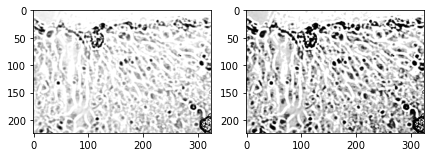

In [12]:
h = histogram(im,0,255,256)
hc = np.cumsum(h)/(im.shape[0]*im.shape[1])
    
im_eq = hc[im]


plt.figure(figsize=(7,7))
plt.subplot(121)
plt.imshow(im[800:,700:],cmap='gray')
plt.subplot(122)
plt.imshow(im_eq[800:,700:],cmap='gray')

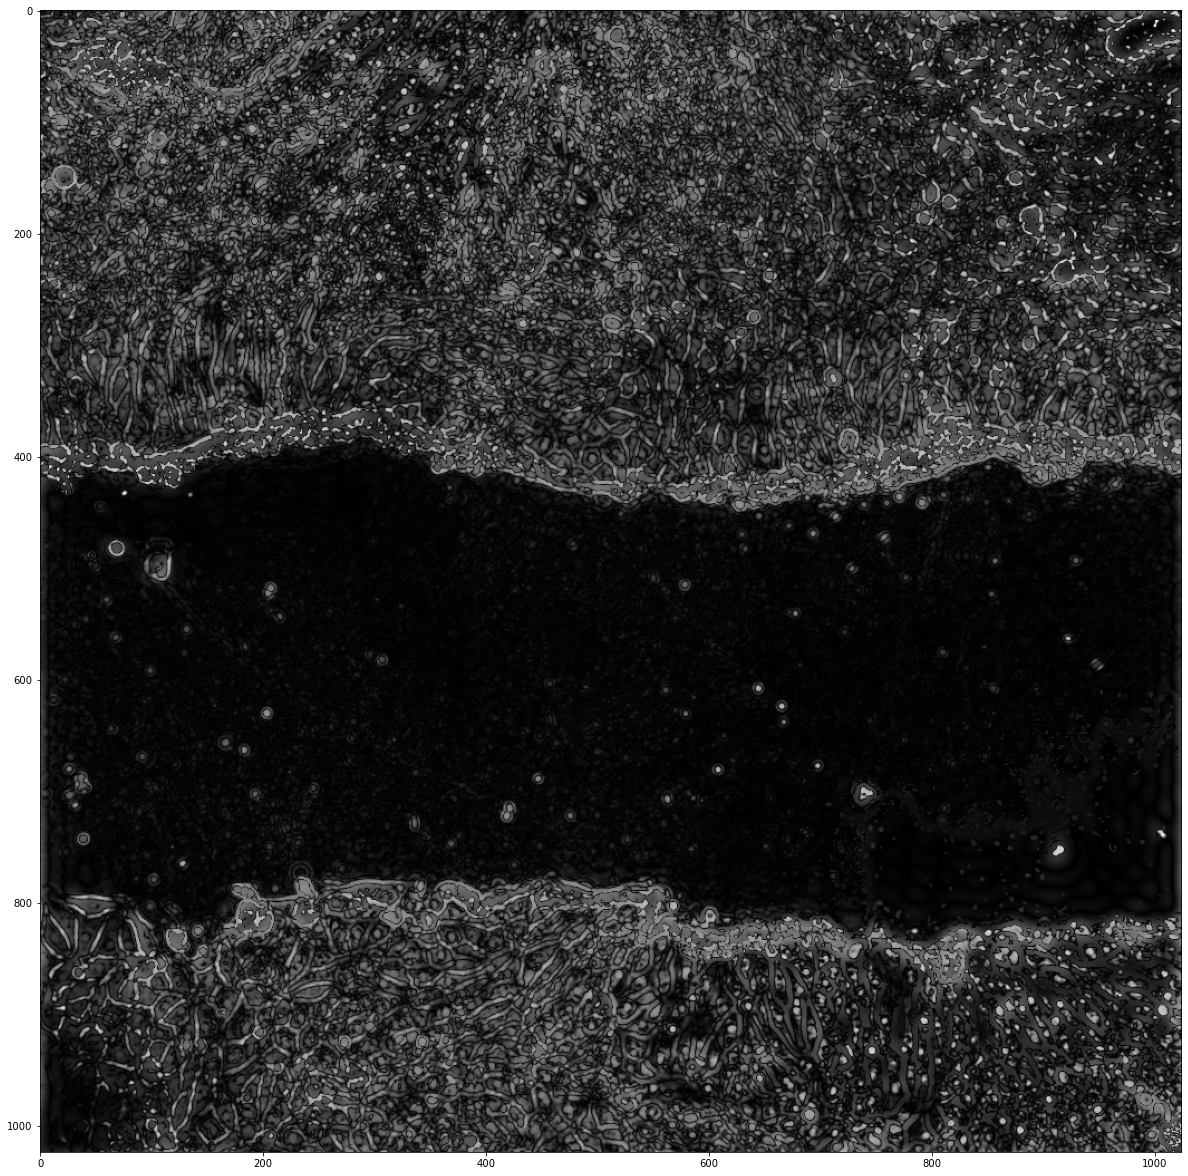

In [13]:
im_tf = np.fft.fftshift(np.fft.fft2(im_eq))
#build Laplacian Filter 
u, v = np.meshgrid(np.linspace(-1, 1, im.shape[0]), np.linspace(-1, 1, im.shape[1]))
lf = u**2 + v**2
circ = lf>0.005

im1 = np.abs(np.fft.ifft2(im_tf*circ))

plt.figure(figsize=(21,21))
plt.imshow(im1,cmap='gray')

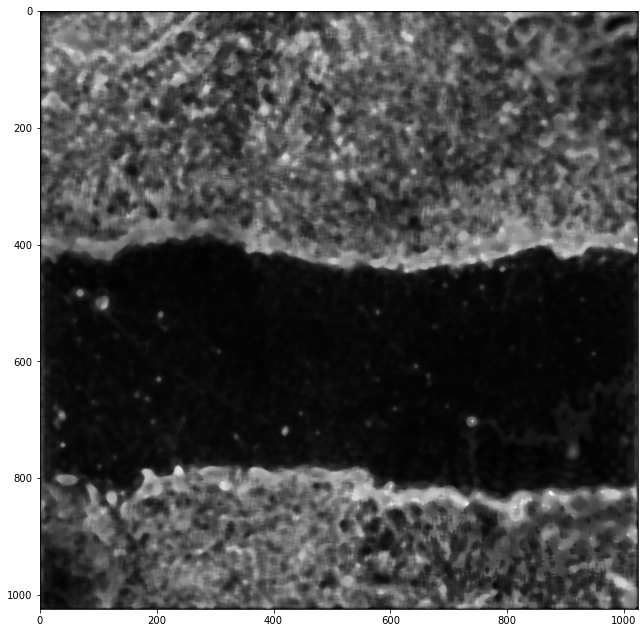

In [14]:
#MEDIAN THRESHOLD
# media = scipy.signal.medfilt(im, [mask size])
# ordena los valores de la imagen dentro de mask y coge el del medio
media = scipy.signal.medfilt2d(im1, kernel_size=[11,11])
plt.figure(figsize=(11,11))
plt.imshow(media,cmap='gray')

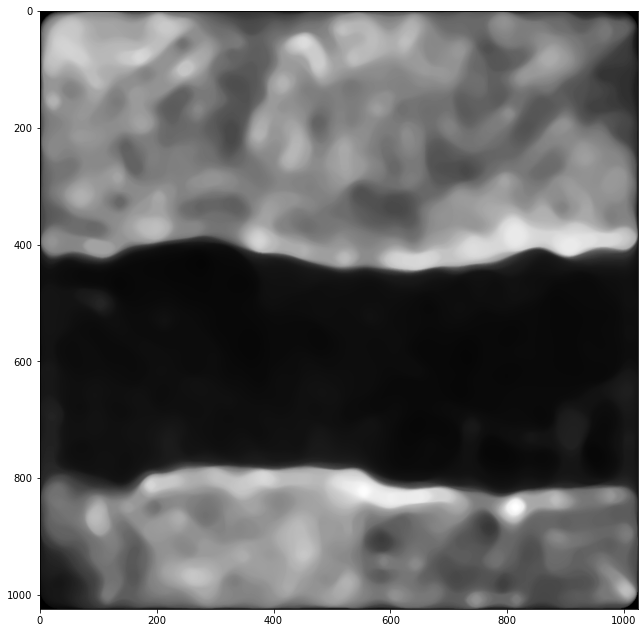

In [15]:
# second MEDIAN THRESHOLD
# media = scipy.signal.medfilt(im, [mask size])
# ordena los valores de la imagen dentro de mask y coge el del medio
media2 = scipy.signal.medfilt2d(media, kernel_size=[41,41])
media3 = scipy.signal.medfilt2d(media2, kernel_size=[21,21])
media4 = scipy.signal.medfilt2d(media3, kernel_size=[21,21])
plt.figure(figsize=(11,11))
plt.imshow(media4,cmap='gray')

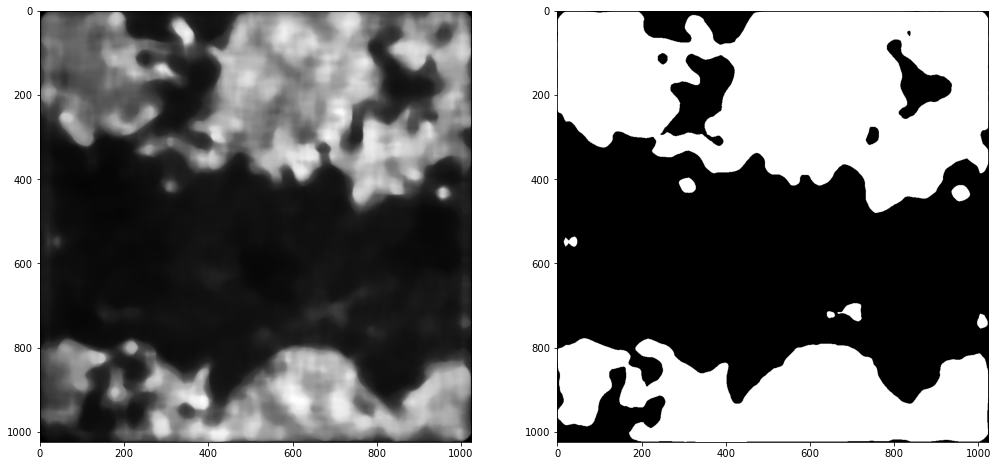

In [10]:
otsu = media2>skimage.filters.threshold_otsu(media2)*0.5
plt.figure(figsize=(17,17))
plt.subplot(121)
plt.imshow(media2,cmap='gray')
plt.subplot(122)
plt.imshow(otsu,cmap='gray')

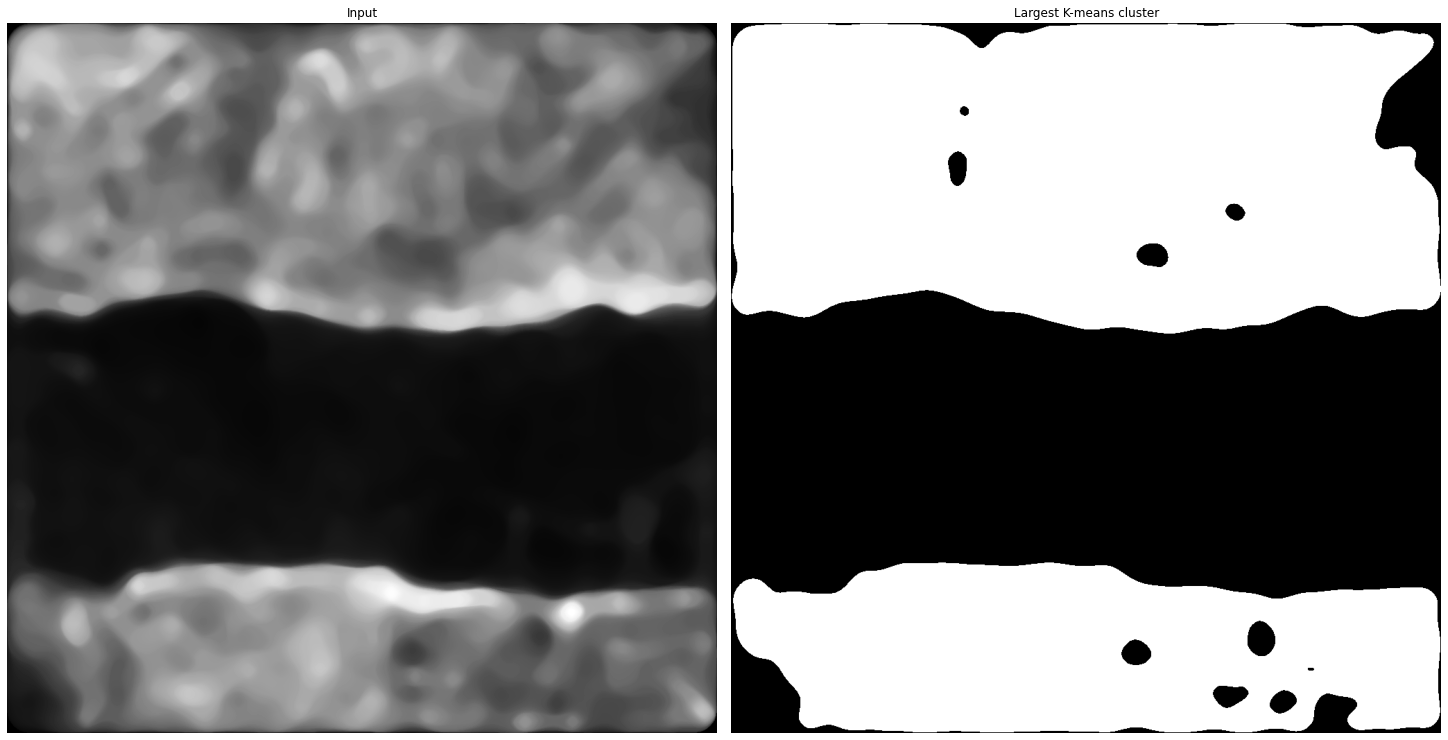

In [17]:
im_seg = impavi.apply_kmeans(media4,2,plot=True)

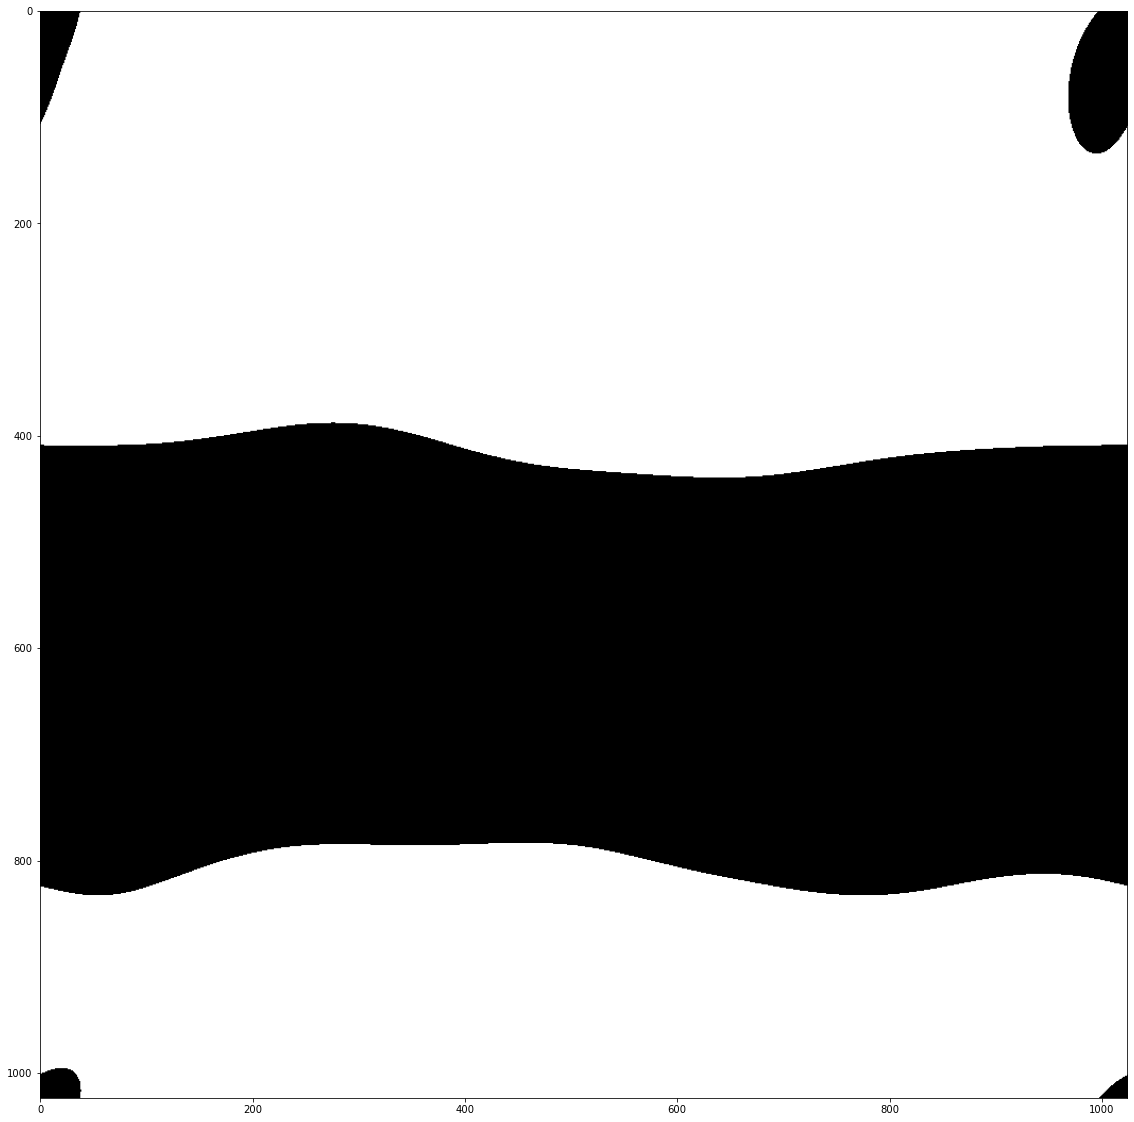

In [19]:
final = impavi.low_pass_filter(im_seg,0.00006,plot=False)
final_otsu = impavi.otsu_filter(final,plot=False)
plt.figure(figsize=(20,20))
plt.imshow(final_otsu,cmap='gray')

In [20]:
print(skimage.metrics.structural_similarity(final_otsu,plt.imread('DIC_SN_15_L10_Sum00_manual.png')))


/Users/codefrom0/opt/anaconda3/lib/python3.9/site-packages/skimage/_shared/utils.py:293: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


0.9602362847110963


In [143]:
dataK = media2.reshape(media2.shape[0]*media2.shape[1],1)
kmn = KMeans(n_clusters=7, init='k-means++',random_state=0).fit(dataK)
# a label (0 to 4) is assigned to e11ach sample (row)
labels = kmn.predict(dataK)

centroids = kmn.cluster_centers_
# from 1d-array to 2d-array

In [12]:
imRes = np.reshape(labels, [media2.shape[0], media2.shape[1]])
plt.imshow(imRes)

NameError: name 'labels' is not defined

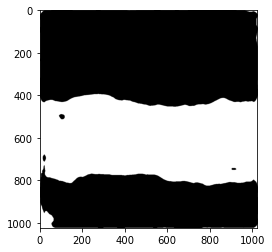

In [145]:
plt.imshow(imRes==0,cmap='gray')